## Sine wave

From [here](https://github.com/pytorch/examples/tree/master/time_sequence_prediction).

In [42]:
import numpy as np
import torch

np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64') # 100 x 1000
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1) # 100 x 1000

* `L`: The length of each observation
* `N`: The number of observations
* `T`: The periodicity of the observations

In [43]:
print("An example observation:", x[:, 0]) # Length 100
print("A single time step; 1000 values of different series:", x[0, :]) # Length 1000

An example observation: [-65  -8 -58 -37  -5  24 -73  15  -5 -33 -17 -49  68  44  36 -43  22 -76
  27 -29  23 -42 -47 -22  44 -13 -11   8 -34  15  41 -49   0 -28 -30  52
 -17 -31 -41  56 -65  56  65  70  37  -7  25  30   3  16 -37 -48 -54  56
  -4  58 -40 -46 -20  57 -10   6 -61 -24  49 -12   1 -19  45  17  66   7
  70 -37 -28 -64 -25  43  69 -37 -10 -21 -63  63  78 -54 -41 -17  68  70
  20 -53 -80 -18  12 -44 -17  -5  30 -30]
A single time step; 1000 values of different series: [-65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48
 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30
 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12
 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61 

In [44]:
data = np.sin(x / 1.0 / T).astype('float64')

In [46]:
torch.save(data, open('data/traindata.pt', 'wb'))

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input, future = 0):
        outputs = []
        # input.size(0): number of features
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            # input.size(1): number of time steps
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
            
        for i in range(future):# if we should predict the future
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]

        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-pack

In [50]:
np.random.seed(0)
torch.manual_seed(0)

# load data and make training set
data = torch.load('data/traindata.pt')
input = torch.from_numpy(data[3:, :-1])
target = torch.from_numpy(data[3:, 1:])
test_input = torch.from_numpy(data[:3, :-1])
test_target = torch.from_numpy(data[:3, 1:])

In [51]:
print(input.shape)
print(target.shape)

torch.Size([97, 999])
torch.Size([97, 999])


**Interpretation**: 

* We have 100 sinusoidal series of length 1000
* For each sequence, we need an "input" and a "target".
* The input is elements 1 through 999. The output is elements 2 through 1000.

STEP:  0
loss: 0.5023738122475343
loss: 0.4985663937943548
loss: 0.47901196061154033
loss: 0.44633490214842186
loss: 0.35406310257493917
loss: 0.20507016617680895
loss: 1.3960531561165066
loss: 0.032494411484717226
loss: 0.02993487583960185
loss: 0.028326821011534428
loss: 0.02683061221882384
loss: 0.023771201989988812
loss: 0.018901413504543614
loss: 0.010646818233204965
loss: 0.008725752090268268
loss: 0.00787218128777697
loss: 0.005477842749593974
loss: 0.004051933564063063
loss: 0.0027296227011584847
loss: 0.0015402652769808999
test loss: 0.001300087615695603


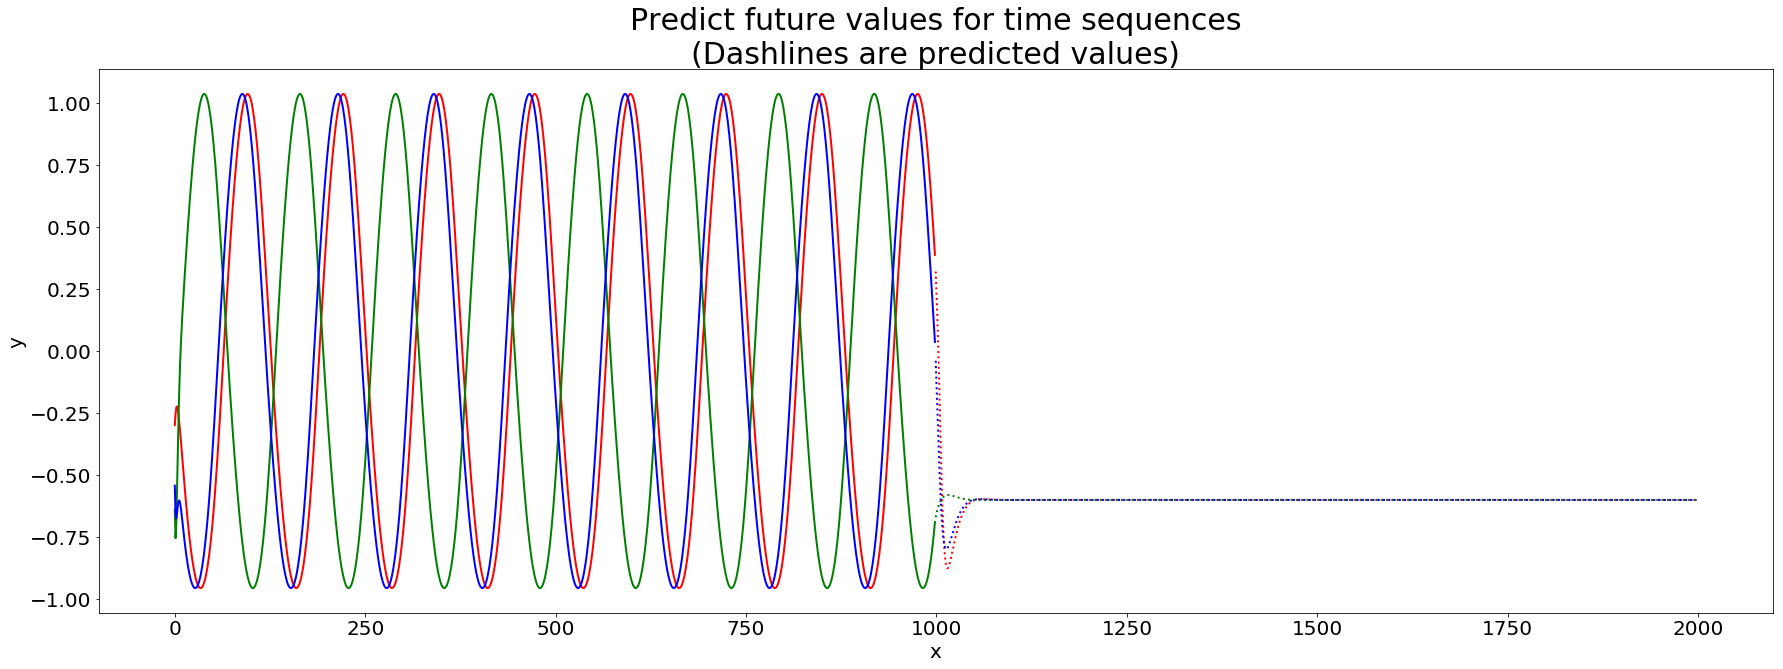

In [52]:
%matplotlib inline

# build the model
seq = Sequence()
seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.8) 
#begin to train
for i in range(1):
    print('STEP: ', i)
    def closure():
        optimizer.zero_grad() # zeroing gradient at each step of LSTM. 
        out = seq(input) # Feeding in entire sequence at each time step. 
        loss = criterion(out, target) # Comparing output sequence 
        # (same length and dimension (see above) as input sequence)
        print('loss:', loss.item())
        loss.backward() # Get gradients
        return loss
    optimizer.step(closure) # Train
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        future = 1000
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target) # See below
        print('test loss:', loss.item())
        y = pred.detach().numpy() # Just get y "out of the graph" and into a numpy array.

    # draw the result
    plt.figure(figsize=(30,10))
    plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    def draw(yi, color):
        plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
        plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
    draw(y[0], 'r')
    draw(y[1], 'g')
    draw(y[2], 'b')
    plt.savefig('predict%d.pdf'%i)

**Note:** LBFGS will do 20 iterations by default. See [here](https://pytorch.org/docs/master/_modules/torch/optim/lbfgs.html).

Explanation of `torch.no_grad()` block:

* `pred[:, :-future]`: Take the last 999 time steps, since `seq` returns both predictions on the input sequence and predictions into the future. 
* `test_target` is just the 999 future time steps the LSTM model is trying to match.